# Milestone 2 - Second Model II

In [1]:
# imports 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from second_scripts import *
from scripts import *

### I. Data Prepration

In [2]:
# Read the data
# data_path = './data'
data_path = './DLCV_SS25_Dataset'  
images, labels = data_reader2(data_path)


In [3]:
num_classes = len(os.listdir(data_path))
num_classes

5

In [4]:
len(images)

2351

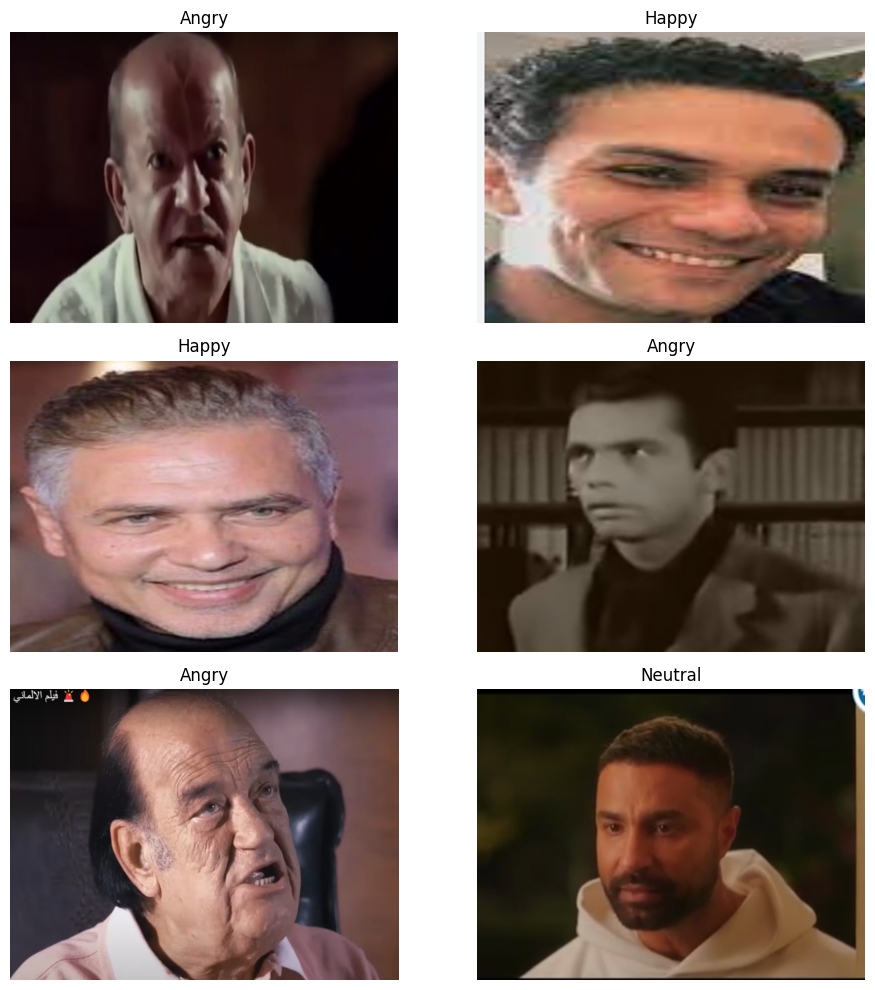

In [5]:
# View 4 random images and their titles
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(images))
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Preprocess the images 
train_tuple, val_tuple, test_tuple, label_to_index = data_preperator2((images, labels))
index_to_label = {v: k for k, v in label_to_index.items()}

train_data, train_labels = train_tuple
val_data, val_labels = val_tuple
test_data, test_labels = test_tuple

train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((1645, 512, 512, 3),
 (1645,),
 (470, 512, 512, 3),
 (470,),
 (236, 512, 512, 3),
 (236,))

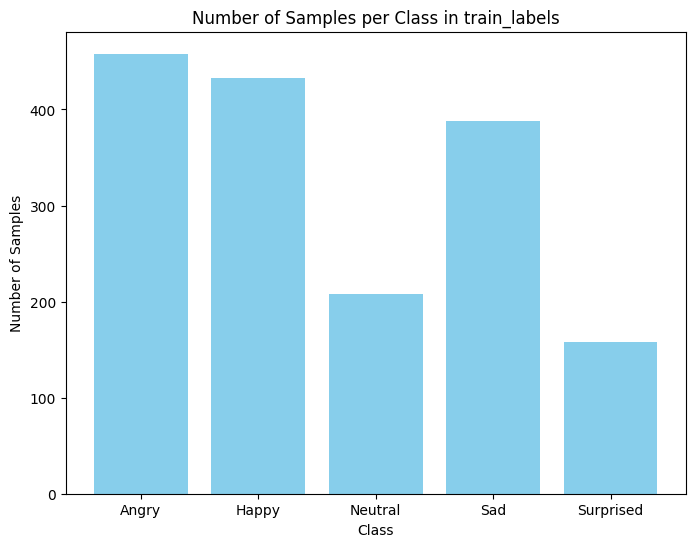

In [7]:
draw_barchart_labels(train_labels, label_to_index)

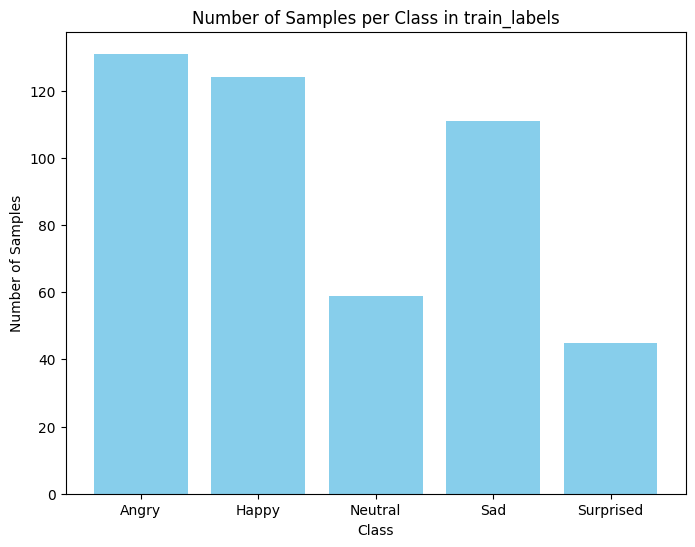

In [8]:
draw_barchart_labels(val_labels, label_to_index)

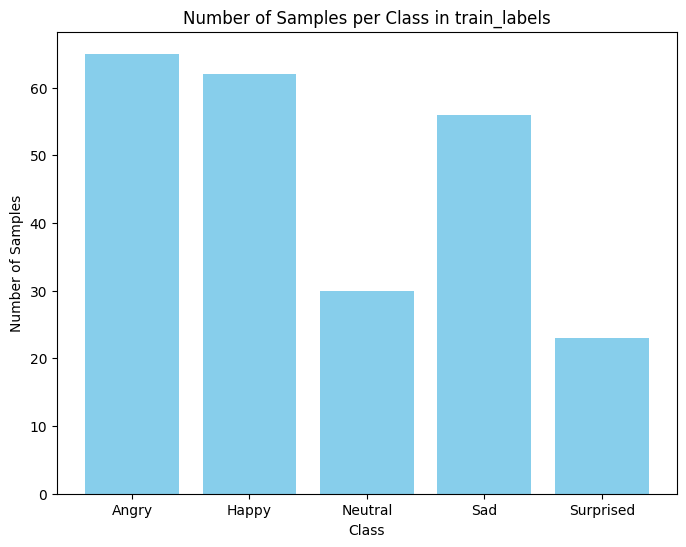

In [9]:
draw_barchart_labels(test_labels, label_to_index)

### II. Second Model

In [10]:
train_loader = convert_to_dataloader(data=(train_data, train_labels), batch_size=16, shuffle=True)
val_loader = convert_to_dataloader(data=(val_data, val_labels), batch_size=16, shuffle=False)
test_loader = convert_to_dataloader(data=(test_data, test_labels), batch_size=16, shuffle=False)

In [11]:
# Test second_model is working
second_model = SecondModel3()

example_image = torch.tensor(train_data[0], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

output = second_model(example_image)

print("Output shape:", output.shape)
print("Output:", output)



Output shape: torch.Size([1, 5])
Output: tensor([[-0.4843, -0.4500, -0.3054, -0.9485,  0.3112]],
       grad_fn=<AddmmBackward0>)


In [12]:
summary(second_model, input_size=(3, 512, 512), batch_size=1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 32, 510, 510]             896
            Conv2d-2          [1, 32, 508, 508]           9,248
            Conv2d-3          [1, 32, 506, 506]           9,248
              ReLU-4          [1, 32, 506, 506]               0
         MaxPool2d-5          [1, 32, 253, 253]               0
       BatchNorm2d-6          [1, 32, 253, 253]              64
         CNNBlock2-7          [1, 32, 253, 253]               0
            Conv2d-8          [1, 64, 251, 251]          18,496
            Conv2d-9          [1, 64, 249, 249]          36,928
           Conv2d-10          [1, 64, 247, 247]          36,928
             ReLU-11          [1, 64, 247, 247]               0
        MaxPool2d-12          [1, 64, 123, 123]               0
      BatchNorm2d-13          [1, 64, 123, 123]             128
        CNNBlock2-14          [1, 64, 1

In [13]:
model = SecondModel3()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
num_epochs = 20

train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20]
train_loss: 0.0965, train_acc: 0.2942


val_Loss: 1.6359  val_Acc: 0.2723  val_Prec: 0.3164  val_Rec: 0.2062  val_F1: 0.1018  val_ROC-AUC: 0.5286
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0938, train_acc: 0.3252


val_Loss: 1.4856  val_Acc: 0.3255  val_Prec: 0.1918  val_Rec: 0.2429  val_F1: 0.1886  val_ROC-AUC: 0.6038
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0929, train_acc: 0.3477


val_Loss: 1.4926  val_Acc: 0.3489  val_Prec: 0.2254  val_Rec: 0.2628  val_F1: 0.2275  val_ROC-AUC: 0.6222
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0926, train_acc: 0.3435


val_Loss: 1.4668  val_Acc: 0.3574  val_Prec: 0.2141  val_Rec: 0.2733  val_F1: 0.2351  val_ROC-AUC: 0.6304
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0914, train_acc: 0.3605


val_Loss: 1.4628  val_Acc: 0.3553  val_Prec: 0.2212  val_Rec: 0.2695  val_F1: 0.2181  val_ROC-AUC: 0.6545
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0899, train_acc: 0.3690


val_Loss: 1.4122  val_Acc: 0.4106  val_Prec: 0.2410  val_Rec: 0.3090  val_F1: 0.2657  val_ROC-AUC: 0.6747
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0881, train_acc: 0.4091


val_Loss: 1.4108  val_Acc: 0.3979  val_Prec: 0.2325  val_Rec: 0.2962  val_F1: 0.2427  val_ROC-AUC: 0.6653
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0880, train_acc: 0.3909


val_Loss: 1.4395  val_Acc: 0.3638  val_Prec: 0.2440  val_Rec: 0.2848  val_F1: 0.2492  val_ROC-AUC: 0.6727
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0871, train_acc: 0.4006


val_Loss: 1.4272  val_Acc: 0.3872  val_Prec: 0.2261  val_Rec: 0.2909  val_F1: 0.2405  val_ROC-AUC: 0.6636
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0858, train_acc: 0.4213


val_Loss: 1.4130  val_Acc: 0.3979  val_Prec: 0.2916  val_Rec: 0.3109  val_F1: 0.2842  val_ROC-AUC: 0.6724
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0850, train_acc: 0.4286


val_Loss: 1.4265  val_Acc: 0.4000  val_Prec: 0.3117  val_Rec: 0.3107  val_F1: 0.2843  val_ROC-AUC: 0.6739
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0835, train_acc: 0.4517


val_Loss: 1.3953  val_Acc: 0.4149  val_Prec: 0.3231  val_Rec: 0.3209  val_F1: 0.2877  val_ROC-AUC: 0.6795
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0833, train_acc: 0.4347


val_Loss: 1.3925  val_Acc: 0.4128  val_Prec: 0.3333  val_Rec: 0.3193  val_F1: 0.2921  val_ROC-AUC: 0.6895
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0820, train_acc: 0.4620


val_Loss: 1.3726  val_Acc: 0.4191  val_Prec: 0.3824  val_Rec: 0.3237  val_F1: 0.2985  val_ROC-AUC: 0.6876
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0802, train_acc: 0.4784


val_Loss: 1.3631  val_Acc: 0.4234  val_Prec: 0.4445  val_Rec: 0.3221  val_F1: 0.2800  val_ROC-AUC: 0.7027
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0795, train_acc: 0.4851


val_Loss: 1.3944  val_Acc: 0.4213  val_Prec: 0.3632  val_Rec: 0.3206  val_F1: 0.2868  val_ROC-AUC: 0.6850
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0783, train_acc: 0.4894


val_Loss: 1.3586  val_Acc: 0.4234  val_Prec: 0.3527  val_Rec: 0.3233  val_F1: 0.2874  val_ROC-AUC: 0.7044
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0769, train_acc: 0.4960


val_Loss: 1.3515  val_Acc: 0.4383  val_Prec: 0.3261  val_Rec: 0.3440  val_F1: 0.3213  val_ROC-AUC: 0.7074
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0770, train_acc: 0.4960


val_Loss: 1.3528  val_Acc: 0.4362  val_Prec: 0.3917  val_Rec: 0.3397  val_F1: 0.3173  val_ROC-AUC: 0.7036
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0752, train_acc: 0.5076


val_Loss: 1.7492  val_Acc: 0.2872  val_Prec: 0.2888  val_Rec: 0.2267  val_F1: 0.1682  val_ROC-AUC: 0.5731
--------------------------------------------------


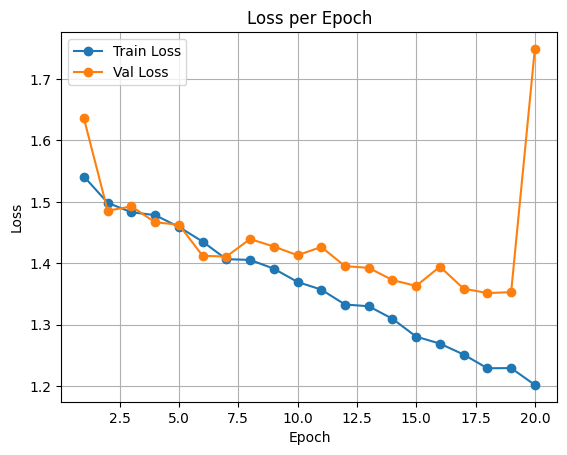

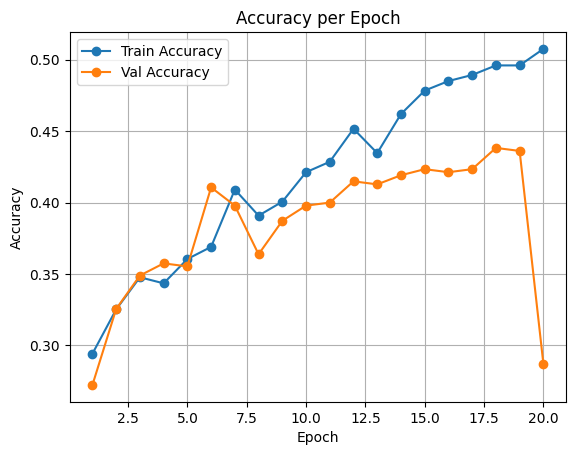

In [14]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [15]:
# criterion = torch.nn.CrossEntropyLoss()
test_metrics = evaluate(model, test_loader, criterion, prefix='test_')

test_Loss: 1.7375  test_Acc: 0.2839  test_Prec: 0.3479  test_Rec: 0.2278  test_F1: 0.1739  test_ROC-AUC: 0.6011


In [16]:
model_path = "./models/second_model_final.pkl"

In [17]:
save_model(model, model_path)

In [13]:
model = load_model(model_path)

In [18]:
images, trues, preds = predict(model, test_loader)

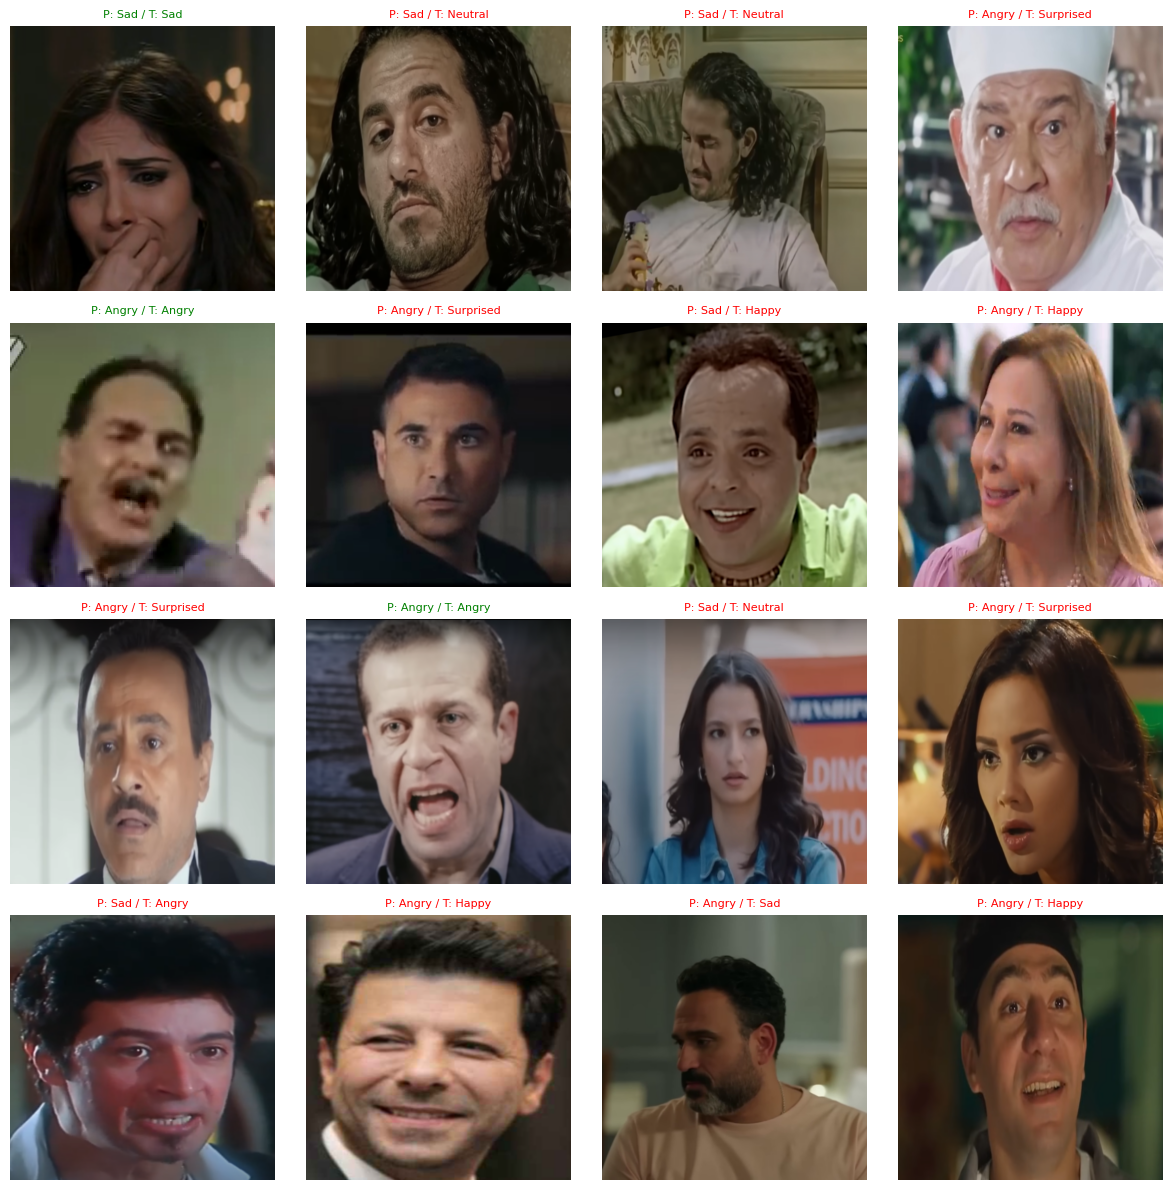

In [19]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4)

#### Using augmentation

In [20]:
# train_loader_augmented = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, use_aug=True)

# index_to_label = {v: k for k, v in label_to_index.items()}
# i = 0
# for im, label in train_loader_augmented:
#     print(im.shape, label.shape)
#     # Display the first image and its label
#     plt.imshow(im[0].permute(1, 2, 0).numpy())
#     plt.title(index_to_label[label[0].item()])
#     plt.axis('off')
#     plt.show()
#     if i==10:
#         break
#     i+=1

In [20]:
train_loader_augmented = convert_to_dataloader_optimized(data=(train_data, train_labels), batch_size=16, use_aug=True)

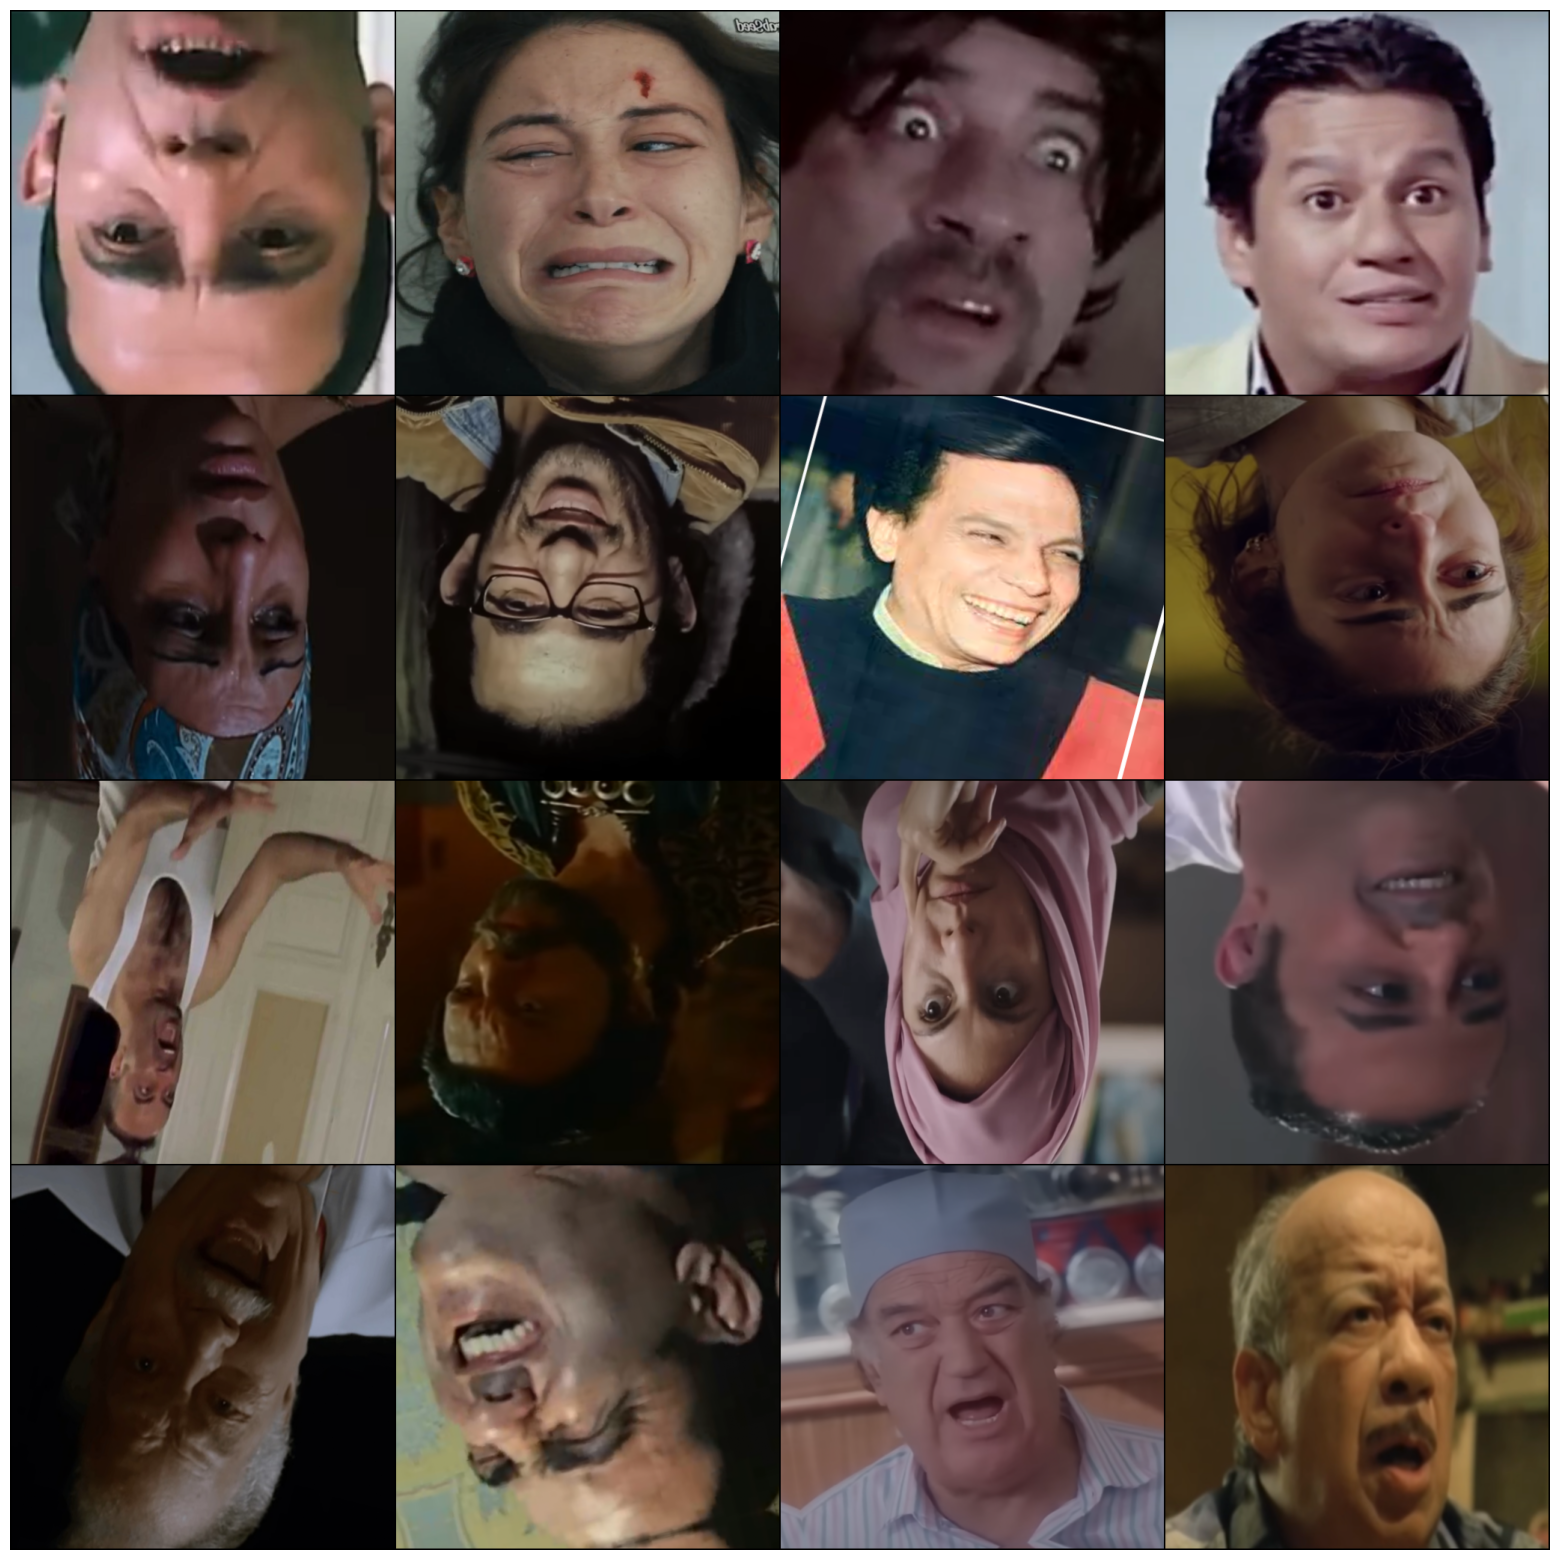

In [21]:
from torchvision.utils import make_grid

images, labels = next(iter(train_loader_augmented))  # shape: [16, 3, 512, 512]

grid = make_grid(images[:16], nrow=4, padding=2)     # → [3, Hg, Wg]

grid_np = grid.permute(1, 2, 0).cpu().numpy()        # → (Hg, Wg, 3)
plt.figure(figsize=(20,20))
plt.imshow(grid_np)
plt.axis('off')
plt.show()


In [22]:
model = SecondModel3()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
num_epochs = 20

train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader_augmented, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20]
train_loss: 0.0987, train_acc: 0.2432


val_Loss: 1.5059  val_Acc: 0.3340  val_Prec: 0.1461  val_Rec: 0.2440  val_F1: 0.1714  val_ROC-AUC: 0.6057
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0945, train_acc: 0.3173


val_Loss: 1.5001  val_Acc: 0.2872  val_Prec: 0.1615  val_Rec: 0.2228  val_F1: 0.1710  val_ROC-AUC: 0.5948
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0937, train_acc: 0.3234


val_Loss: 1.6009  val_Acc: 0.2851  val_Prec: 0.1764  val_Rec: 0.2179  val_F1: 0.1406  val_ROC-AUC: 0.5465
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0934, train_acc: 0.3246


val_Loss: 1.5239  val_Acc: 0.2574  val_Prec: 0.2025  val_Rec: 0.1967  val_F1: 0.1459  val_ROC-AUC: 0.5899
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0931, train_acc: 0.3283


val_Loss: 1.4912  val_Acc: 0.3638  val_Prec: 0.3530  val_Rec: 0.2667  val_F1: 0.1910  val_ROC-AUC: 0.5989
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0934, train_acc: 0.3410


val_Loss: 1.4933  val_Acc: 0.3255  val_Prec: 0.2241  val_Rec: 0.2406  val_F1: 0.1924  val_ROC-AUC: 0.6377
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0921, train_acc: 0.3392


val_Loss: 1.4743  val_Acc: 0.3447  val_Prec: 0.2252  val_Rec: 0.2584  val_F1: 0.2112  val_ROC-AUC: 0.6331
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0916, train_acc: 0.3502


val_Loss: 1.4331  val_Acc: 0.3574  val_Prec: 0.2138  val_Rec: 0.2697  val_F1: 0.2287  val_ROC-AUC: 0.6470
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0907, train_acc: 0.3666


val_Loss: 1.5769  val_Acc: 0.3085  val_Prec: 0.2111  val_Rec: 0.2339  val_F1: 0.1582  val_ROC-AUC: 0.6267
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0905, train_acc: 0.3647


val_Loss: 1.4338  val_Acc: 0.3574  val_Prec: 0.2089  val_Rec: 0.2650  val_F1: 0.2086  val_ROC-AUC: 0.6433
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0902, train_acc: 0.3544


val_Loss: 1.4289  val_Acc: 0.3787  val_Prec: 0.2291  val_Rec: 0.2892  val_F1: 0.2548  val_ROC-AUC: 0.6594
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0900, train_acc: 0.3733


val_Loss: 1.4394  val_Acc: 0.3617  val_Prec: 0.4219  val_Rec: 0.2751  val_F1: 0.2317  val_ROC-AUC: 0.6617
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0900, train_acc: 0.3702


val_Loss: 1.4104  val_Acc: 0.3872  val_Prec: 0.2317  val_Rec: 0.2948  val_F1: 0.2588  val_ROC-AUC: 0.6800
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0896, train_acc: 0.3660


val_Loss: 1.4328  val_Acc: 0.3723  val_Prec: 0.2192  val_Rec: 0.2849  val_F1: 0.2458  val_ROC-AUC: 0.6613
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0896, train_acc: 0.3720


val_Loss: 1.4333  val_Acc: 0.3489  val_Prec: 0.4071  val_Rec: 0.2705  val_F1: 0.2314  val_ROC-AUC: 0.6600
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0898, train_acc: 0.3818


val_Loss: 1.4136  val_Acc: 0.3809  val_Prec: 0.2719  val_Rec: 0.2959  val_F1: 0.2640  val_ROC-AUC: 0.6746
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0891, train_acc: 0.3860


val_Loss: 1.4107  val_Acc: 0.3851  val_Prec: 0.2305  val_Rec: 0.2932  val_F1: 0.2553  val_ROC-AUC: 0.6724
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0895, train_acc: 0.3818


val_Loss: 1.4096  val_Acc: 0.3787  val_Prec: 0.2552  val_Rec: 0.2959  val_F1: 0.2609  val_ROC-AUC: 0.6830
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0883, train_acc: 0.4000


val_Loss: 1.4022  val_Acc: 0.3830  val_Prec: 0.2262  val_Rec: 0.2916  val_F1: 0.2501  val_ROC-AUC: 0.6864
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0886, train_acc: 0.3805


val_Loss: 1.3819  val_Acc: 0.4191  val_Prec: 0.3585  val_Rec: 0.3241  val_F1: 0.2981  val_ROC-AUC: 0.6947
--------------------------------------------------


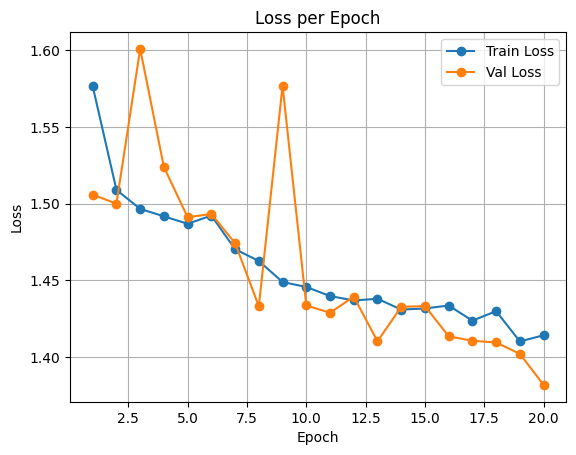

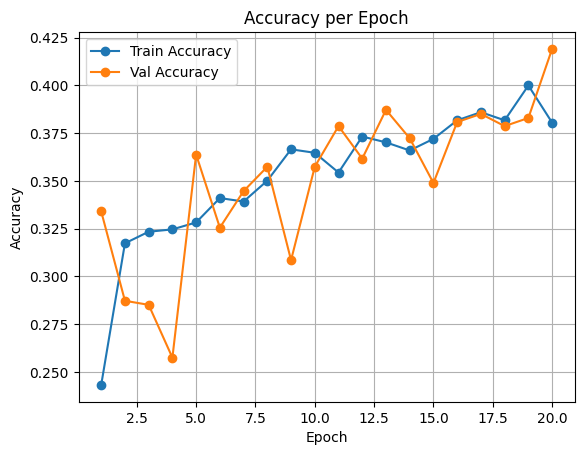

In [23]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [24]:
test_metrics = evaluate(model, test_loader, criterion, prefix='test_')

test_Loss: 1.4450  test_Acc: 0.3686  test_Prec: 0.2881  test_Rec: 0.2863  test_F1: 0.2629  test_ROC-AUC: 0.6460


In [25]:
model_path = "./models/second_model_final_aug.pkl"

In [26]:
save_model(model, model_path)

In [9]:
model = load_model(model_path)

In [27]:
images, trues, preds = predict(model, test_loader)

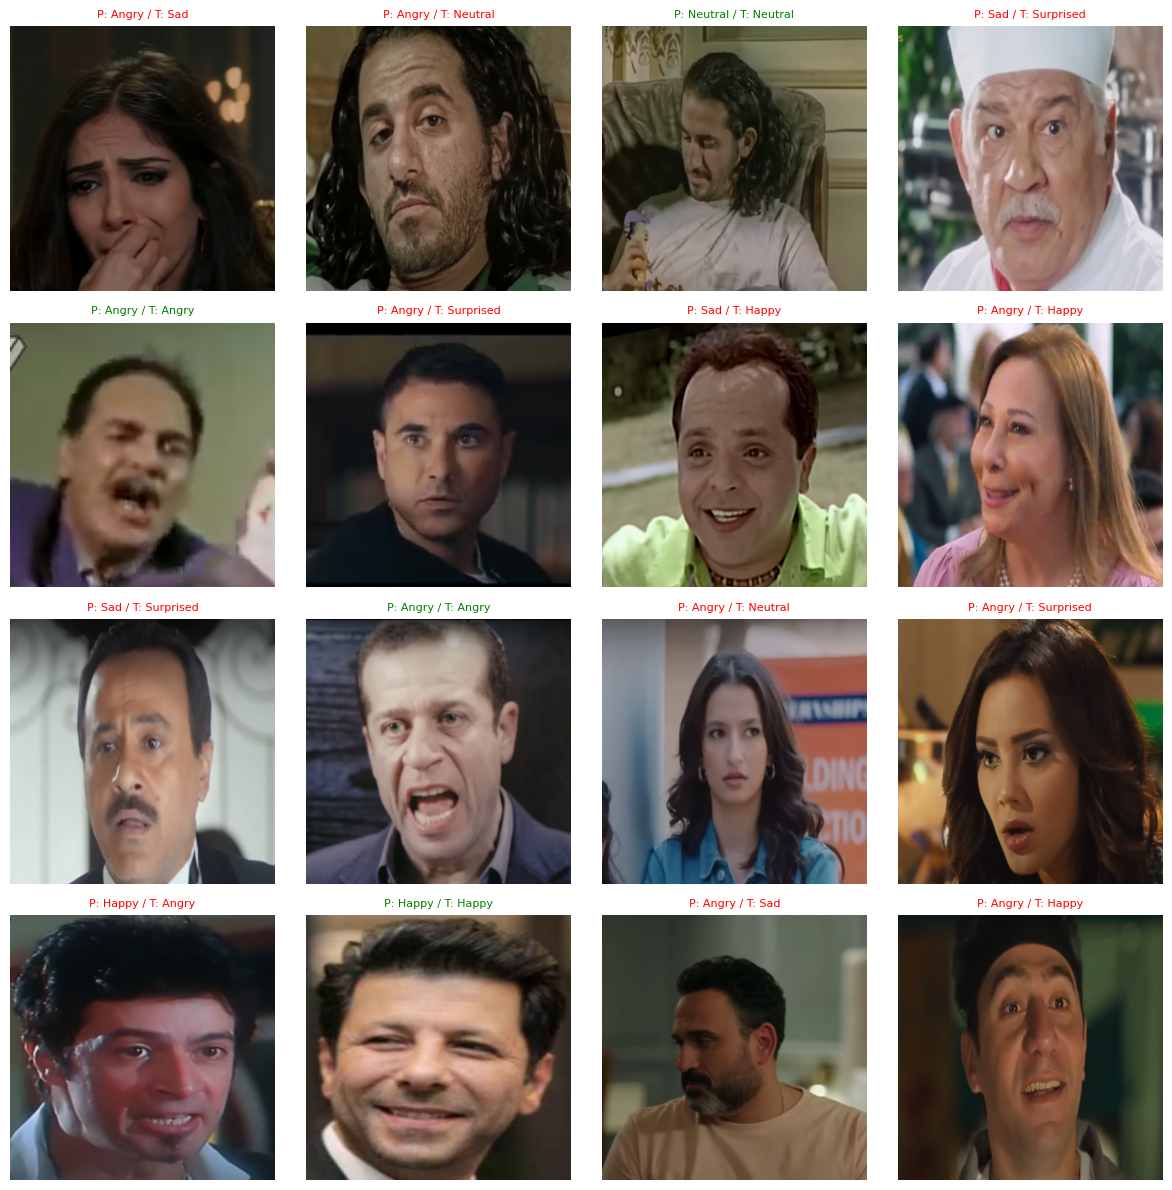

In [28]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4)